# Implementation

### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import time

In [3]:
#Importing data from CVS
df = pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

In [4]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
#Leaving of first column as we have index
df.drop('Unnamed: 0', axis=1,inplace=True)

In [6]:
#Removing rows with nan
df.dropna(subset=['Review Text','Division Name','Department Name','Class Name'],inplace=True)

In [7]:
df.columns = ['Clothing_Id', 'Age', 'Title', 'Review', 'Rating', 'Recommended_IND', 'Positive_Feedback_Count','Division_Name', 'Department_Name', 'Class_Name']

In [8]:
df.head(3)

,Clothing_Id,Age,Title,Review,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [9]:
# FInding number of unique things in each column
print('Clothing_Id :' + str(len(list(set(df['Clothing_Id'])))))
print('Age :' + str(len(list(set(df['Age'])))))
print('Rating :' + str(len(list(set(df['Rating'])))))
print('Recommended_IND :' + str(len(list(set(df['Recommended_IND'])))))
print('Positive_Feedback_Count :' + str(len(list(set(df['Positive_Feedback_Count'])))))
print('Division_Name :' + str(len(list(set(df['Division_Name'])))) + str(set(df['Division_Name'])))
print('Department_Name :' + str(len(list(set(df['Department_Name'])))) +  str(set(df['Department_Name'])))
print('Class_Name :' + str(len(list(set(df['Class_Name'])))))

Clothing_Id :1172
Age :77
Rating :5
Recommended_IND :2
Positive_Feedback_Count :82
Division_Name :3{'General Petite', 'General', 'Initmates'}
Department_Name :6{'Bottoms', 'Intimate', 'Dresses', 'Jackets', 'Tops', 'Trend'}
Class_Name :20


## Analysis 1: Department and Division v.s Review count

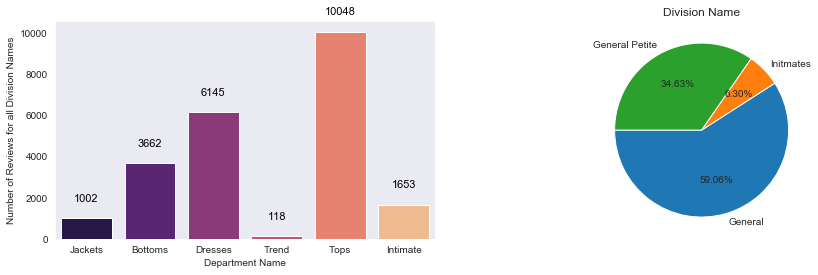

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
f, axes = plt.subplots (1,2, figsize=(15,4))

x = ['Jackets', 'Bottoms', 'Dresses', 'Trend', 'Tops', 'Intimate']
y = [df.Department_Name[(df['Department_Name']=='Jackets')].count(),
     df.Department_Name[(df['Department_Name']=='Bottoms')].count(),
     df.Department_Name[(df['Department_Name']=='Dresses')].count(),
     df.Department_Name[(df['Department_Name']=='Trend')].count(),
     df.Department_Name[(df['Department_Name']=='Tops')].count(),
     df.Department_Name[(df['Department_Name']=='Intimate')].count(), ]

v1= sns.barplot(x,y,palette='magma', ax=axes[0])
v1.set(xlabel='Department Name',ylabel='Number of Reviews for all Division Names')

for r in v1.patches:
             v1.annotate("%.f" % r.get_height(), (r.get_x() + r.get_width() / 2., r.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

p = [df.Division_Name[(df['Division_Name']=='General')].count(), df.Division_Name[(df['Division_Name']=='Initmates')].count(), df.Division_Name[(df['Division_Name']=='General Petite')].count() ]
q = ['General', 'Initmates', 'General Petite']

plt.title('Division Name')
plt.pie(p, labels=q, startangle=180, autopct='%.2f%%')
plt.ioff()

## Analysis 2: Department and Division v.s Positive Feedback Count

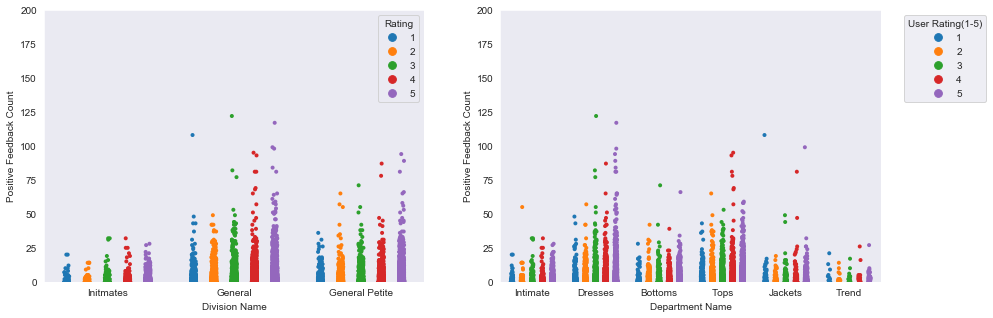

In [11]:
f, axes = plt.subplots (1,2, figsize=(15,5))

#stripplot Number of positive feedbacks given by people for different Division name giving different ratings
v1= sns.stripplot(x='Division_Name',y='Positive_Feedback_Count',data=df,hue='Rating',dodge=True, size=4, ax=axes[0])
v1.set(ylim=(0, 200))
v1.set(xlabel='Division Name',ylabel='Positive Feedback Count')

#stripplot Number of positive feedbacks given by people for different Department Name giving different ratings
v2= sns.stripplot(y='Positive_Feedback_Count' , x='Department_Name',data=df,hue='Rating',dodge=True,size=4, ax=axes[1])
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))
v2.set(ylim=(0, 200))
v2.set(xlabel='Department Name',ylabel='Positive Feedback Count')

plt.ioff()

### Creating Rating Class

In [12]:
data_class = df

In [13]:
data_class['Class'] = 'Bad'
data_class.loc[data_class.Rating>3,['Class']]  = 'Good'
data_class.drop(['Title', 'Age','Rating'], axis=1, inplace=True)

## Applying Natural Language Processing

In [14]:
model_data = data_class
model_data.drop(['Clothing_Id','Recommended_IND','Positive_Feedback_Count','Division_Name','Department_Name','Class_Name'], axis=1, inplace=True)

In [15]:
model_data['Processed_review'] = np.nan

In [16]:
model_data = model_data.reset_index()
model_data.drop(['index'], axis=1,inplace=True)

In [17]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
import string

ps = PorterStemmer()
sno = SnowballStemmer('english') 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [18]:
# CLeaning and add it to the DataFrame
def process(i):
    orginal_sent = model_data['Review'][i]
    tokenized_sent = word_tokenize(orginal_sent)
    stop_sent = [w for w in tokenized_sent if w not in stop_words and w not in string.punctuation]
    lemmatized_sent = [lemmatizer.lemmatize(w) for w in stop_sent]
    model_data['Processed_review'][i] = ' '.join(lemmatized_sent)

for i in range(len(model_data['Review'])):
    try:
        process(i)
    except:
        pass

### Creating Bag of Words

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import sklearn

In [20]:
# Vectorizing and defining x and y
vectorize = TfidfVectorizer(use_idf = True, lowercase=True, strip_accents='ascii', stop_words=stop_words,max_features=4000)
y = model_data.Class
x = vectorize.fit_transform(model_data.Processed_review)

### Naive Bayes (BernoulliNB)

In [21]:
def model_BernoulliNB():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421,test_size=0.2)
    # Training the model
    clf = naive_bayes.BernoulliNB()  
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test,y_pred) * 100, time.time() - start_time

### Random Forest

In [22]:
def model_RandomForestClassifier():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = RandomForestClassifier()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

### Decision Tree

In [23]:
 def DecisionTreeClassifier():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = tree.DecisionTreeClassifier()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

### SVM (linear kernel)

In [31]:
def model_SVM_Linear():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=421)
    # Training the model
    clf = svm.SVC(kernel='linear')   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

### Logistic Regression

In [32]:
def model_LogisticRegression():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    # Training the model
    clf = sklearn.linear_model.LogisticRegression()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

### K Nearest Neighbors

In [33]:
def model_KNeighborsClassifier():
    start_time = time.time()
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    # Training the model
    clf = sklearn.neighbors.KNeighborsClassifier()   
    clf.fit(x_train, y_train)
    # Testing
    y_pred = clf.predict(x_test)
    return (accuracy_score(y_test,y_pred) * 100), (time.time() - start_time)

## Summary of Observations

In [34]:
models = [model_BernoulliNB(), model_RandomForestClassifier(), DecisionTreeClassifier(), model_SVM_Linear(), model_LogisticRegression(), model_KNeighborsClassifier()]

models_name = ['BernoulliNB','RandomForestClassifier', 'DecisionTreeClassifier', 'SVM_Linear', 'LogisticRegression','KNeighborsClassifier']

accuracy = []
timing = []
for m in models:
    acc, tim = m
    accuracy.append(acc)
    timing.append(tim)
result = pd.DataFrame({'Models' : models_name, 'Accuracy' : accuracy, 'Timing' : timing})
result

,Models,Accuracy,Timing
0,BernoulliNB,87.406098,0.072840
1,RandomForestClassifier,85.274881,12.411051
2,DecisionTreeClassifier,77.868128,4.532441
3,SVM_Linear,88.456779,42.320557
4,LogisticRegression,87.625950,0.275372
5,KNeighborsClassifier,81.279830,5.072535


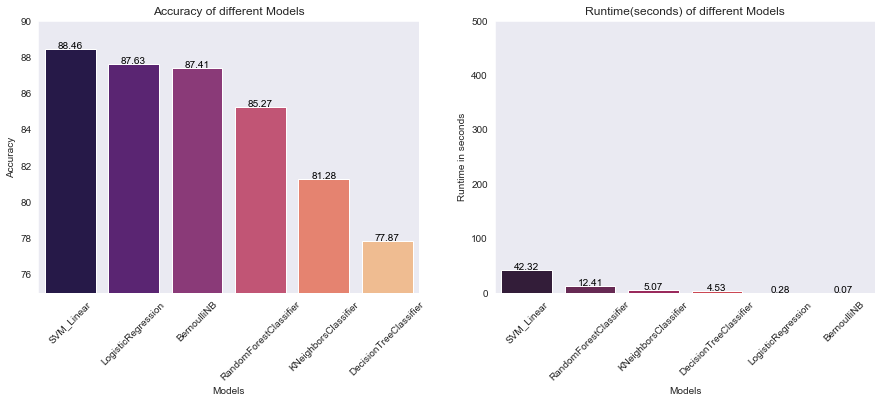

In [35]:
# plotting Accuracy and Timings of all models
f, axes = plt.subplots (1,2, figsize=(15,5))

# Accuracy
result.sort_values(by=['Accuracy'], ascending=False, inplace=True)
result = result.reset_index()
result.drop(['index'], axis=1,inplace=True)

v1= sns.barplot(y='Accuracy' , x='Models', data=result,dodge=True, ax=axes[0],palette='magma',)
v1.set(ylim=(75, 90))
v1.set(xlabel='Models',ylabel='Accuracy')
v1.set_xticklabels(v1.get_xticklabels(), rotation=45)
v1.set_title('Accuracy of different Models')

for index, row in result.iterrows():
    v1.text(row.name,row.Accuracy, round(row.Accuracy,2), color='black', ha="center")


# Timing
result.sort_values(by=['Timing'], ascending=False, inplace=True)
result = result.reset_index()
result.drop(['index'], axis=1,inplace=True)

v2= sns.barplot(y='Timing' , x='Models', data=result,dodge=True, ax=axes[1],palette='rocket',)
v2.set(ylim=(0, 500))
v2.set(xlabel='Models',ylabel='Runtime in seconds')
v2.set_xticklabels(v2.get_xticklabels(), rotation=45)
v2.set_title('Runtime(seconds) of different Models')

for index, row in result.iterrows():
    v2.text(row.name,row.Timing, round(row.Timing,2), color='black', ha="center")

plt.ioff()

### Inference after applying NLP

**On selecting the test_size= 0.20 & max_features= 4000, we get the following accuracy score in different classification models:**

* naive_bayes.BernoulliNB = 87.4 %
* RandomForestClassifier = 85.0 %
* tree.DecisionTreeClassifier = 77.8 %
* support vector machine svm.SVC(kernel='linear') = 88.4 %
* linear_model.LogisticRegression = 87.2 %
* sklearn.neighbors.KNeighborsClassifier = 81.0%

**It is seen that support vector machine svm.SVC(kernel='linear') model predicts the test set with most accuracy.**